1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

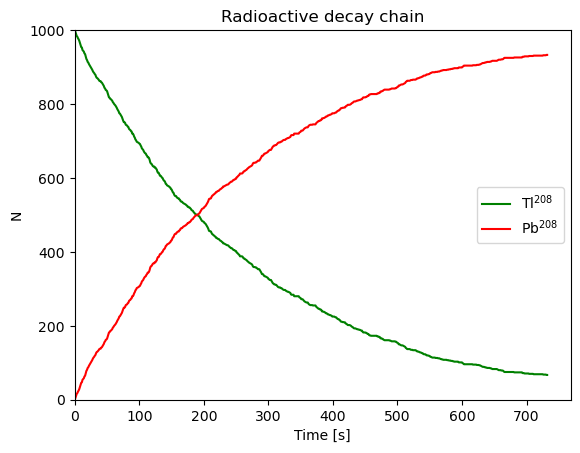

In [1]:
import numpy as np
import matplotlib.pyplot as plt

half_life = 3.052 * 60  # secondi
N0 = 1000               # nuclei iniziali
dt = 1                  # passo temporale (1 s)

#Qui ho messo la probabilità di decadimento, che è uguale ad ogni step
#Deriva dalla formula di probabilità condizionata P(decade nel prossimo intervallo delta-t | non decade fino a t)
def p(dt, tau):
    return 1 - 2**(-dt / tau)

max_time = int(half_life * 4)
time = np.arange(0, max_time + 1, dt)

N_alive = N0
N_decayed = 0
alive_list = []
decayed_list = []

for t in time:
    alive_list.append(N_alive)
    decayed_list.append(N_decayed)

    # decadimenti nel prossimo intervallo dt
    decayed = np.sum(np.random.rand(N_alive) < p(dt, half_life))
    N_alive -= decayed
    N_decayed += decayed

fig, ax = plt.subplots()
ax.plot(time, alive_list, label=r'$\mathrm{Tl}^{208}$', color='g')
ax.plot(time, decayed_list, label=r'$\mathrm{Pb}^{208}$', color='r')

ax.set_xlim(0)
ax.set_ylim(0, N0)

ax.set_title('Radioactive decay chain')
ax.set_xlabel('Time [s]')
ax.set_ylabel('N')
ax.legend()

Text(0, 0.5, 'Particles not yet decayed')

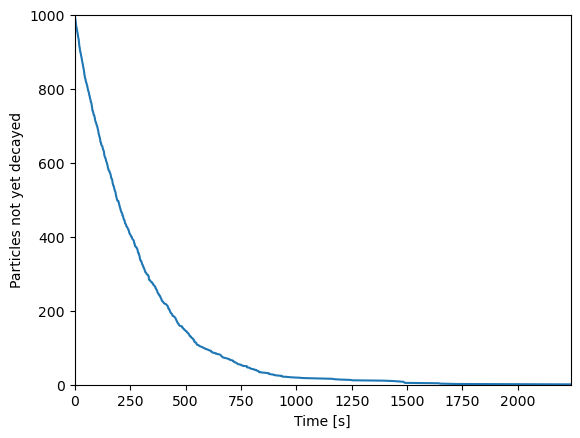

In [2]:
def t(tau, prob):
    return (-1)*tau*np.log2(1-prob)

probarray = np.random.random(1000)
decaytime = np.sort(t(half_life, probarray))
decayed = np.arange(1000) + 1

plt.Figure(figsize=(7, 7))
plt.plot(decaytime, decayed[::-1])
plt.xlim(0, decaytime.max()); plt.ylim(0, 1000)
plt.xlabel("Time [s]"); plt.ylabel("Particles not yet decayed")

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [3]:
from scipy.constants import epsilon_0, pi, hbar, electron_mass, elementary_charge
from scipy.stats import multivariate_normal
import scipy.linalg as la

a0 = (4*pi*epsilon_0*hbar**2)/(electron_mass*elementary_charge**2)
E, Z = 7.7*elementary_charge*10**(6), 79
N = 10**6

mean, cov = [0, 0], np.diag([(a0/100)**2, (a0/100)**2])
particles_pos = multivariate_normal.rvs(mean=mean, cov=cov, size=N)
b_array = la.norm(particles_pos, axis=1)

theta_array = 2*np.arctan((Z*elementary_charge**2)/(2*pi*epsilon_0*E*b_array))
len(theta_array[theta_array > (pi/2)])/len(theta_array)

0.001462

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [16]:
from scipy.integrate import quad

def f(x):
    return np.sin(1/(x*(2-x)))**2

#Using scipy functions
normal_int = quad(func=f, a=0, b=2)

#Hit/miss method
N = 100000
guesses = np.random.random(N)
x_interval = np.random.uniform(low=0 + 10**-9, high=2-10**-9, size=(N,))
hitmiss_int = 2*len(guesses[guesses < f(x_interval)])/N
print(normal_int[0], hitmiss_int, normal_int[0] - hitmiss_int) #2 is the dimention of my range [0, 2], thus the base

#Mean value method
mean_int = np.sum(f(x_interval))*2/N
print(mean_int, mean_int - normal_int[0])

1.4516877509810684 1.45036 0.0013277509810682986
1.453875456650341 0.0021877056692725105


C:\Users\Utente\AppData\Local\Temp\ipykernel_21276\2615420740.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  normal_int = quad(func=f, a=0, b=2)


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [38]:
from scipy.special import gamma

#Area of a circle
N = 10000000
domain = np.random.uniform(low=-1, high=1, size=(N, 2))
mask = la.norm(a=domain, axis=1) < 1
circlearea = len(domain[mask])/N*4 #The total area of the domain is 4 since I sample from a square of side 2
print(circlearea, f"The actual area is {pi**(2/2)/gamma(2/2 + 1)}")

#Area of a 10D sphere
domain_10D = np.random.uniform(low=-1, high=1, size=(N, 10))
mask_10D = la.norm(a=domain_10D, axis=1) < 1
MCarea = len(domain_10D[mask_10D])/N*2**10 
correctarea = pi**(10/2)/gamma(10/2 + 1)
print(MCarea, f"The actual area is {correctarea}")

3.1415464 The actual area is 3.141592653589793
2.5653248 The actual area is 2.550164039877345


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [ ]:
def integrand(x):
    return x**(-1/2)/(np.exp(x) + 1)

def w(x):
    return 1/np.sqrt(x)

def inv_w(y):
    return (y/2)**2

n = 10000
y_samples = np.random.uniform(low=0, high=2, size=(n,))
x = inv_w(y_samples)

I = 1./n * np.sum(integrand(x)/w(x)) * 2
print(I)

#with this I can create a sample of the integrals. The result will be a gaussian distribution thanks to the CLT

np.float64(0.8355621330903501)

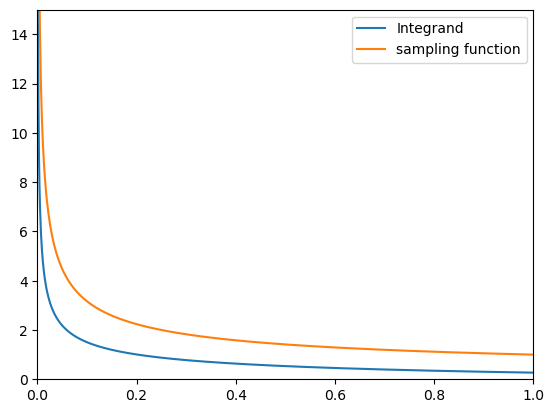

In [58]:
import matplotlib.pyplot as plt

x = np.linspace(0 + 10**(-9), 1, 1000)

plt.Figure(figsize=(7, 7))
plt.plot(x, integrand(x), label='Integrand')
plt.plot(x, w(x), label='sampling function')
plt.ylim(0, 15); plt.xlim(0, 1) 
plt.legend()